In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import MSAtools as msa


print (msa.nOxy)

In [3]:
#Nonner
import numpy as np
#nOxy = 8.0
#msa.nOxy = 8.0
#idxOxy = 0
#msa.idxOxy = 0
#msa.idxNa = 2
#conc_M = np.array([1e-200, (152.0e-3+2.0e-6), 150.0e-3, 1.0e-6])  # [M] order is  O Cl, Na, Mg, Ca (bath) 
#zs = np.array([-0.5, -1.0, 1.0, 2.00]) #input charges here
#Ns = np.array([8.0, 1., 1., 1.]) # Filter
#V_i = 0.375 # radius from RDF + rOxy, nm^3
#V_i = 0.1131 #3.0 angstrom radius
#FF RADII (Li/Merz)#
#sigmas = np.array([0.278, 0.362, 0.204, 0.200])
#epsilonFilter = 63.5

In [4]:
## most recent as of May 16 2016

#nOxy = 6.5
#msa.nOxy = 6.5
#idxOxy = 0
#msa.idxOxy = 0
#conc_M = np.array([1e-200, (152.0e-3+2.0e-6), 150.0e-3, 1.0e-6, 1.0e-3])  # [M] order is  O Cl, K, Mg, Ca (bath) 
#zs = np.array([-0.7469, -1.0, 1.0, 1.77,1.69]) #input charges here
#Ns = np.array([7.0, 1., 1., 1.,1.]) # Filter; no need to change this
#V_i = 0.613 # FILTER VOLUME; radius from RDF + rOxy, nm^3
#V_i = 0.1131 #3.0 angstrom radius
#sigmas = np.array([0.354, 0.454, 0.352, 0.272,0.236]) # IONIC Radii based on Force Fields (Li/Merz)#
#epsilonFilter = 63.5

In [5]:
# list order is Oxygen, Cl, K+, Ca2+, Mg2+
import numpy as np

filter_dielectric = 25.0 
V_i = [0.22, 0.33,0.43] #-> Filter volume from SERCA MD (RDF + rOxy)
#V_i = [0.65,0.78] # FILTER VOLUME; radius from RDF + rOxy, nm^3, be Mg,Ca,K
#NOXY = [3.93,4.19,5.32,5.37,5.46,5.47,5.8,6.73,6.9] # number of oxygens a.a-only
NOXY = [4.73,5.19,5.32,6.37,6.26,8.47,5.8,6.73,6.9] # number of oxygens a.a + water
#NOXY = [4,5,6] # Amir's paper: 
nIons = 5
#calc2s = np.array([-6])
#cacl2s = 10**np.linspace(-10,-1,nConcs)
cacl2s = 10**-6 #Set CaCl2 fixed
zs = np.array([-0.7469, -1.0, 1.0, 1.77,1.69]) #input charges here 
sigmas = np.array([0.354, 0.454, 0.352, 0.272,0.236]) # IONIC Radii based on Force Fields (Li/Merz)#

rhoFilters=[]
donnanPotentials=[]
mufilters=[]
mu_ESs=[]
mu_HSs=[]
    #these lists store results with solvation
rhoFilters_s=[]
donnanPotentials_s =[]
mufilters_s=[]
mu_ESs_s=[]
mu_HSs_s=[]

for i,j in enumerate(NOXY):
    print (j)
    Ns = np.array([j, 1., 1., 1.,1.])
    #these lists store result with solvation
    temp_rhoFilters=[]
    temp_donnanPotentials=[]
    temp_mufilters=[]
    temp_mu_ESs=[]
    temp_mu_HSs=[]
    #these lists store results with solvation
    temp_rhoFilters_s=[]
    temp_donnanPotentials_s =[]
    temp_mufilters_s=[]
    temp_mu_ESs_s=[]
    temp_mu_HSs_s=[]
    for m,n in enumerate(V_i):
        msa.nOxy=Ns[0]
        print (n) # here n is the filter volume 
        muiexsPrev = np.zeros(nIons)
        psiPrev = 0.
        muiexsPrev = 0
        alpha = 0.00010
        conc_M = np.array([1e-200, (150.0e-3 + 2*cacl2s + 4e-3), 150.0e-3, cacl2s,2e-3]) # [M] order is  O Cl, K, Ca Mg(bath) 
     
  #now turn on the solvation...
        mufilteri_s,donnanPotentiali_s,mu_ESi_s,mu_HSi_s,rhoFilteri_s = msa.SolveMSAEquations(filter_dielectric,conc_M,zs,Ns,n,sigmas, \
                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=alpha,solvation = True)
    
     
        
        temp_mufilters_s.append(mufilteri_s)
        temp_mu_ESs_s.append(mu_ESi_s)
        temp_mu_HSs_s.append(mu_HSi_s)
        temp_rhoFilters_s.append(rhoFilteri_s) 
        temp_donnanPotentials_s.append(donnanPotentiali_s)
        
        muiexsPrev=mufilteri_s 
        psiPrev = donnanPotentiali_s  
      
   
    #these lists store results with solvation
    rhoFilters_s.append(temp_rhoFilters_s)
    donnanPotentials_s.append(temp_donnanPotentials_s)
    mufilters_s.append(temp_mufilters_s)
    mu_ESs_s.append(temp_mu_ESs_s)
    mu_HSs_s.append(temp_mu_HSs_s)
# convert list into array 
#rhoFilters = np.asarray(rhoFilters)
#mufilters = np.asarray(mufilters)
#mu_HSs = np.asarray(mu_HSs)
#mu_ESs = np.asarray(mu_ESs)

4.73
0.22
MAIN
0.33
MAIN
0.43
MAIN
5.19
0.22
MAIN
0.33
MAIN
0.43
MAIN
5.32
0.22
MAIN
0.33
MAIN
0.43
MAIN
6.37
0.22
MAIN


/home/AD/bsu233/plotfigures/SERCA_MSA/MSAtools.py:137: RuntimeWarning: invalid value encountered in log
  HSmu+= xi_0*sigmas*sigmas*sigmas*(1.+HSphifilter) - np.log(delta)


0.33
MAIN
0.43
MAIN
6.26
0.22
MAIN
0.33
MAIN
0.43
MAIN
8.47
0.22
MAIN
0.33
MAIN
0.43
MAIN
5.8
0.22
MAIN
0.33
MAIN
0.43
MAIN
6.73
0.22
MAIN
0.33
MAIN
0.43
MAIN
6.9
0.22
MAIN
0.33
MAIN
0.43
MAIN


In [6]:

def getdata(dataset,ions):
    if ions == "Mg":
        idx = 4
    elif ions == "Ca":
        idx = 3
    elif ions == "K":
        idx = 2
    matrix = np.zeros((3,9))
    data = matrix
    for i,j in enumerate(V_i):
        for m,n in enumerate(NOXY):
            data[i,m] = dataset[m][i][idx]
    
    return data

import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (2.5,1.5)
matplotlib.rcParams['savefig.dpi'] = 500
matplotlib.rcParams['mathtext.rm'] = 'serif'


In [7]:
cadensity = getdata(rhoFilters_s,"Ca")
Mgdensity = getdata(rhoFilters_s,"Mg")
Kdensity = getdata(rhoFilters_s,"K")

#plt.pcolormesh(mgdata)
# muex = mues + muhs 

ca_mues = getdata(mu_ESs_s,"Ca")
Mg_mues = getdata(mu_ESs_s,"Mg")
K_mues = getdata(mu_ESs_s,"K")

ca_muhs = getdata(mu_HSs_s,"Ca")
Mg_muhs = getdata(mu_HSs_s,"Mg")
K_muhs = getdata(mu_HSs_s,"K")

ca_muex = getdata(mufilters_s,'Ca')
Mg_muex = getdata(mufilters_s,'Mg')
K_muex = getdata(mufilters_s,'K')

In [8]:
from matplotlib.colors import LinearSegmentedColormap
vmax = 5
cmap = LinearSegmentedColormap.from_list('mycmap', [(0/vmax, 'darkblue'),\
                                                             (1.25/vmax, 'aqua'),\
                                                            (2.5/vmax, 'limegreen'),\
                                                              ( 3.75/vmax, 'yellow'),\
                                                           (5 / vmax, 'red')],
                                                )


In [9]:
def drawheatmap(data,title=None,factor=1,vmax=None,vmin=None,**font):
    plt.pcolormesh(data*factor,cmap=cmap,vmin=vmin,vmax=vmax)
    plt.ylabel("Filter Volume (nm$^3$)",fontsize=10)
    plt.xlabel("Number of Oxygens",fontsize=10)
    #plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[3.93,4.19,5.32,5.37,5.46,5.47,5.8,6.73,6.9],fontsize=8)
    plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[3.93,4.19,5.32,5.37,5.46,5.47,5.8,6.73,6.9],fontsize=8)
    plt.yticks([0.5,1.5,2.5],[0.22,0.33,0.43],fontsize=8)
    plt.colorbar()

In [10]:
# convert filter cation density to free energy based on 
# -RTln(rho_f/rho_b) = deltaG
def convert_to_energy(bathconc,filter_concentration):
    RT = 0.593 #kcal/mol
    return -RT*np.log(filter_concentration/bathconc)
    

[[ -6.71046692  -6.80857085  -6.82672947  -6.10623373  -6.71246059
  146.81986991  -6.85508707  -0.37030623   3.34810075]
 [ -4.70136316  -5.85848888  -5.99686203  -6.53970126  -6.50561758
   -6.85428484  -6.3212282   -6.63463859  -6.67248817]
 [  2.20107988   1.40344177   0.57260098  -5.3110203   -5.03586677
   -6.5771761   -2.55854812  -5.827577    -5.97203986]]


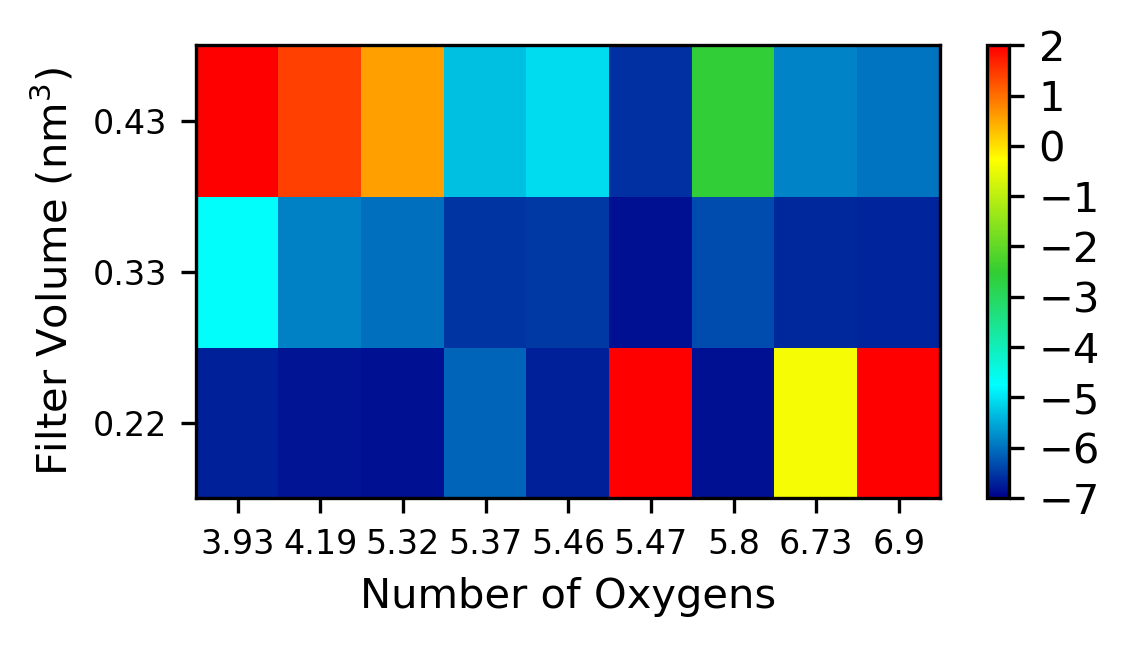

In [11]:
#print (cadensity)
caenergy = convert_to_energy(cacl2s,cadensity)
print (caenergy)
matplotlib.rcParams['figure.figsize']=(4,2)
matplotlib.rcParams['figure.dpi'] = 300
drawheatmap(caenergy,vmax=2,vmin=-7,factor=1)


[[-2.12158123e+00 -1.89300503e+00 -1.81092327e+00  3.86083019e+00
  -2.99602563e-02             inf -1.36336146e+00  3.84696852e+01
   6.01096400e+01]
 [-2.48048895e+00 -2.45727253e+00 -2.44490082e+00 -2.29005599e+00
  -2.31061623e+00 -1.53997018e+00 -2.38582037e+00 -2.21409168e+00
  -2.17285335e+00]
 [-2.35047274e+00 -2.40395432e+00 -2.41699729e+00 -2.47783094e+00
  -2.48032125e+00 -2.26387920e+00 -2.46062995e+00 -2.45943452e+00
  -2.44753354e+00]]


/home/AD/bsu233/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


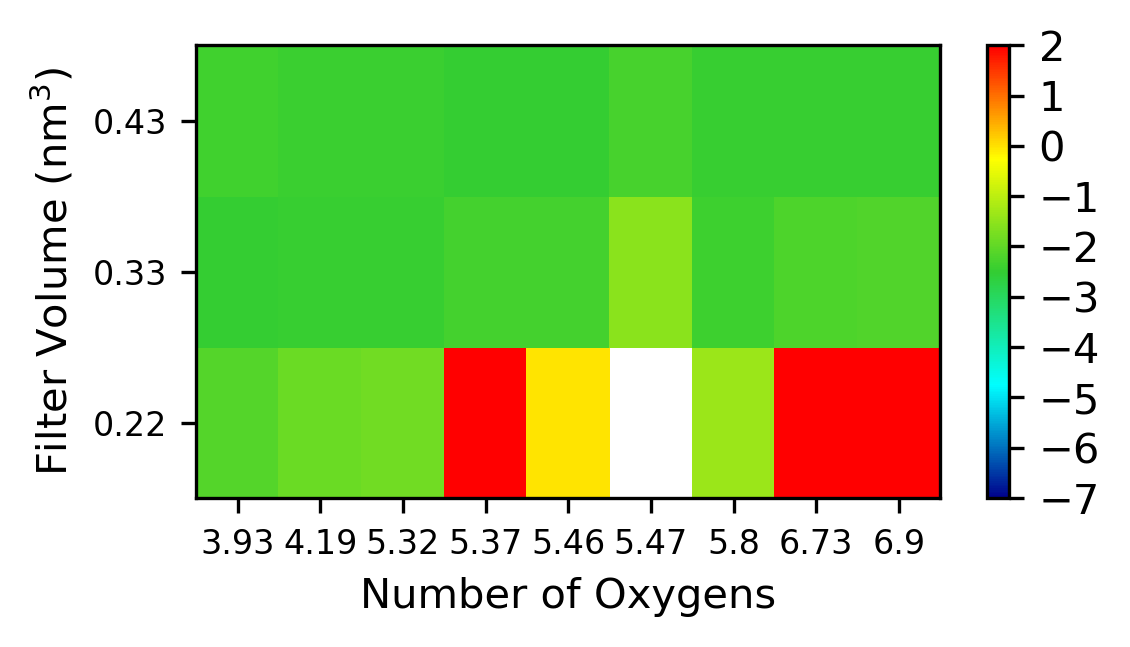

In [12]:
Kenergy = convert_to_energy(150.0e-3,Kdensity)
drawheatmap(Kenergy,vmax=2,vmin=-7,factor=1)
print (Kenergy)

#drawheatmap(ca_muhs,factor=1)
#drawheatmap(ca_muex,factor=1)


#drawheatmap(Mgdensity,factor=1)

[[-4.66987781 -4.84109333 -4.88086608 -5.11312983 -5.09911324 -4.10891059
  -5.00752687 -5.10568957 -5.09196185]
 [-2.30005848 -3.5555364  -3.71814857 -4.41726513 -4.3694806  -4.97058746
  -4.12171917 -4.5542876  -4.61095653]
 [ 4.69406039  3.90336087  3.07390121 -2.94627102 -2.65208067 -4.47045392
  -0.09361494 -3.51979505 -3.68878961]]


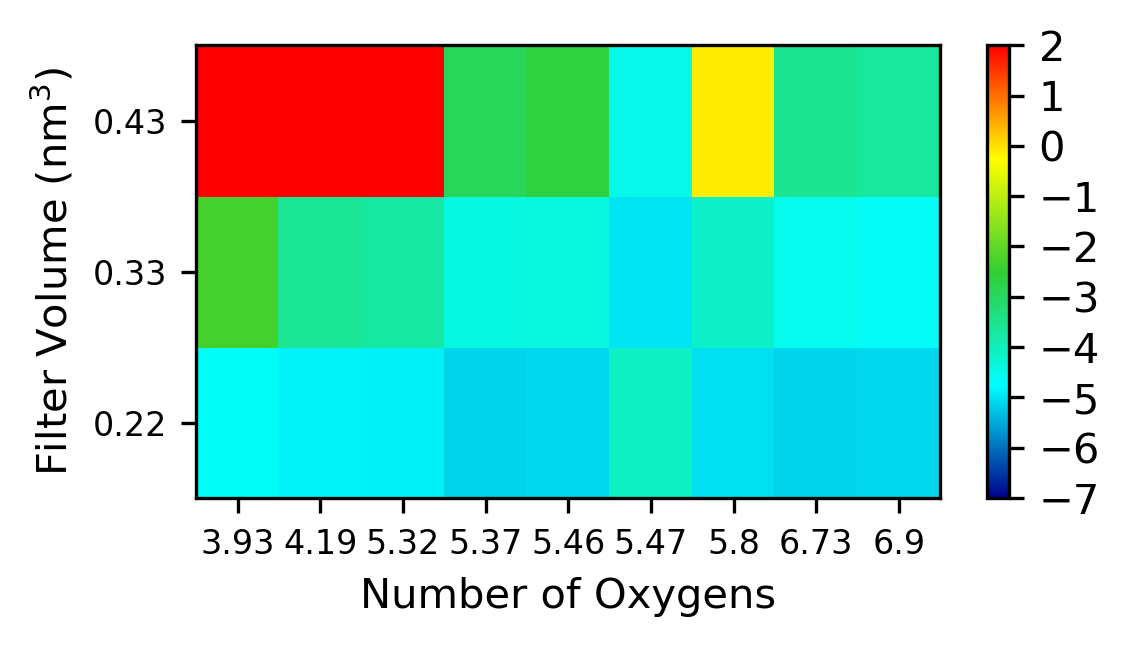

In [13]:
Mgenergy = convert_to_energy(2e-3,Mgdensity)
drawheatmap(Mgenergy,vmax=2,vmin=-7,factor=1)
print (Mgenergy)

#drawheatmap(Kdensity,factor=1)

In [14]:
cadensity = getdata(mufilters_s,"Ca")
Mgdensity = getdata(mufilters_s,"Mg")
Kdensity = getdata(mufilters_s,"K")

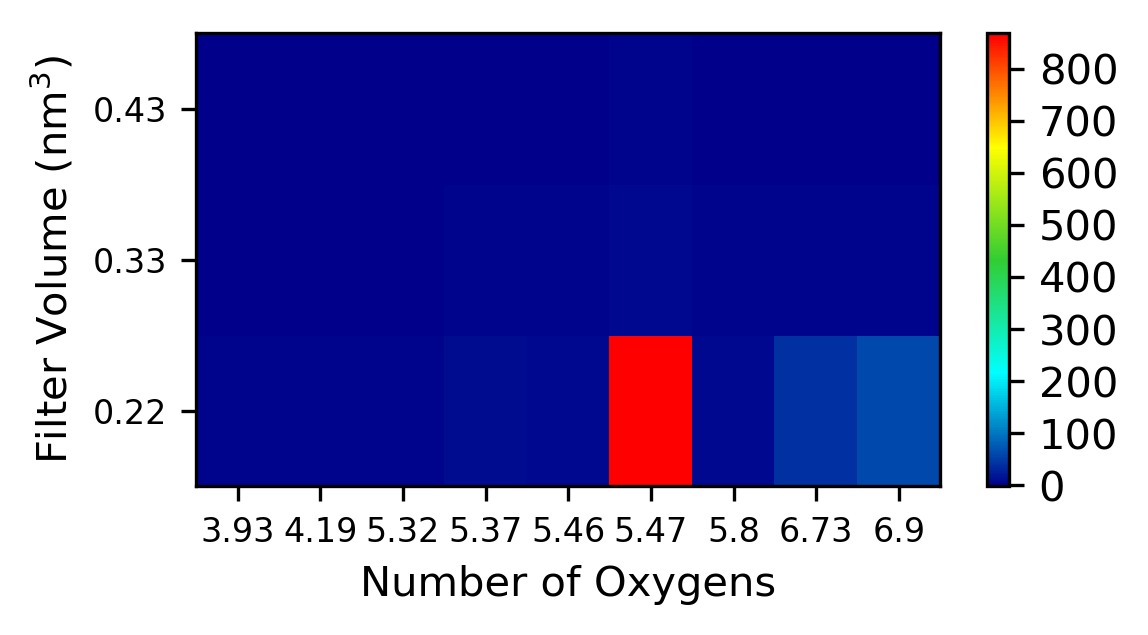

In [15]:
drawheatmap(cadensity,factor=1)

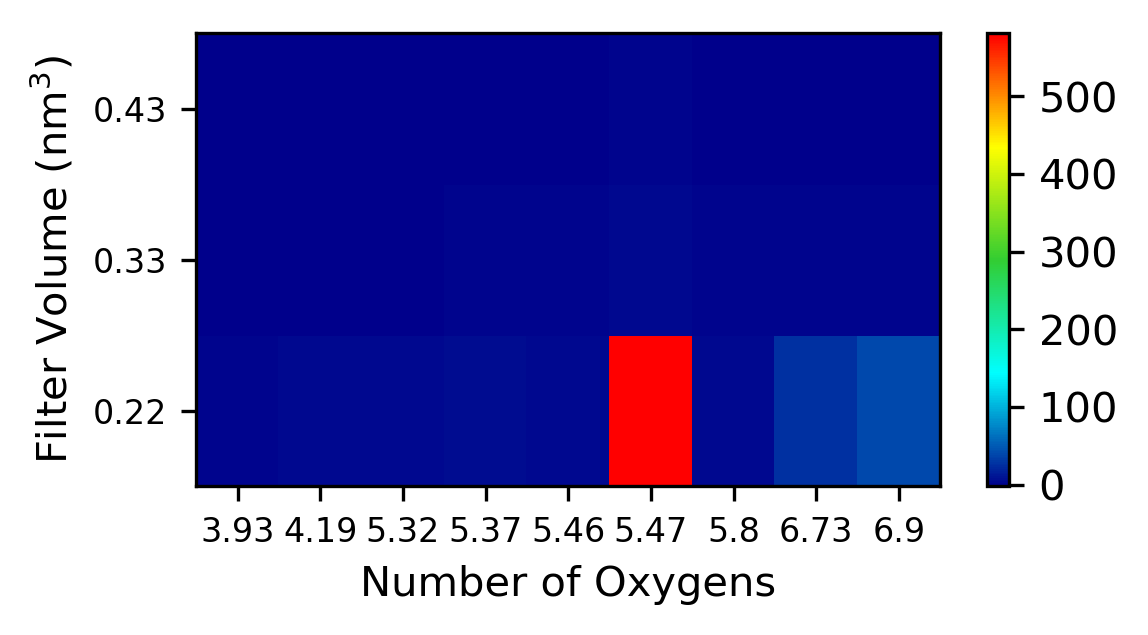

In [16]:
drawheatmap(Mgdensity,factor=1)

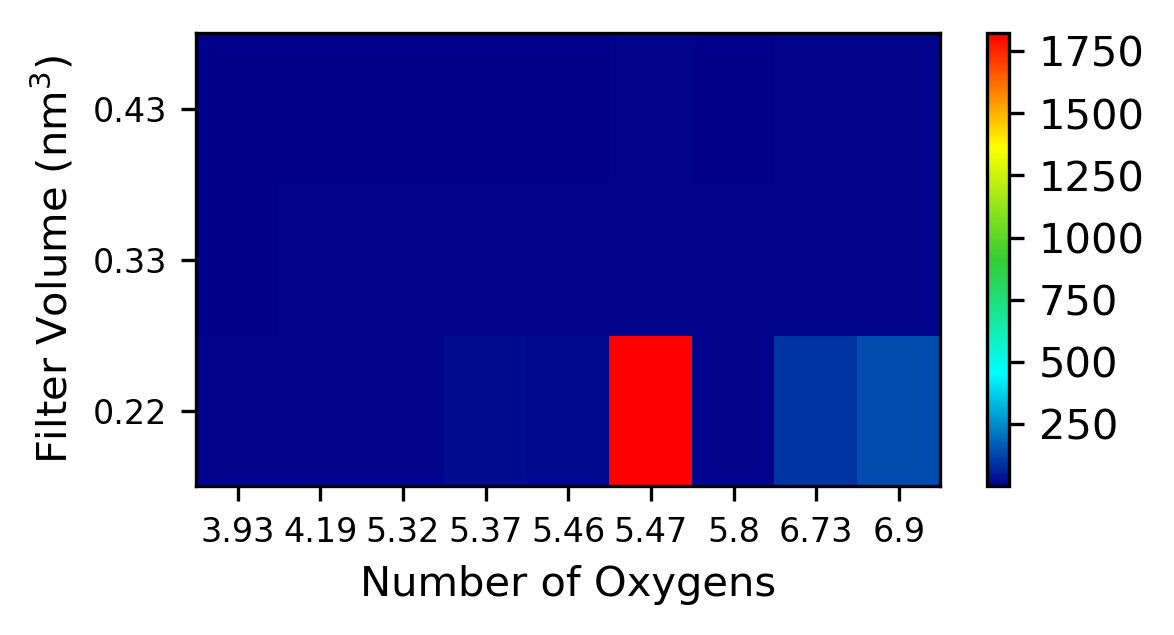

In [17]:
drawheatmap(Kdensity,factor=1)

In [18]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
import numpy as np
matplotlib.rcParams['figure.figsize'] = (2.5,1.5)
matplotlib.rcParams['savefig.dpi'] = 500
matplotlib.rcParams['mathtext.rm'] = 'serif'
# now see how filter concentration change with varying bath [Ca]
Ns = np.array([7, 1., 1., 1.,1.])

varyingCa_mufilteri=[]
varyingCa_mu_ESi=[]
varyingCa_mu_HSi=[]
varyingCa_rhoFilters=[]
varyingCa_donnanPotentiali=[]

# these list store the results when -25 mV membrane potential is considered
EvaryingCa_mufilteri=[]
EvaryingCa_mu_ESi=[]
EvaryingCa_mu_HSi=[]
EvaryingCa_rhoFilters=[]
EvaryingCa_donnanPotentiali=[]



V_i=0.33
nConcs=40
factor_of_divalent=7.4 # increased ion concentration due to -25 mV potentail at membrane Ieff = e^(-beta Z phi)*Ibath
# so factor_of_divalent = 7.4 and factor_of_monovalent= 2.65
factor_of_monovalent=2.65
original_cacl2s = 10**np.linspace(-10,-1,nConcs)


for i in original_cacl2s:
    msa.nOxy=Ns[0]
    print (i)
    muiexsPrev = np.zeros(nIons)
    psiPrev = 0.
    muiexsPrev = 0
    alpha = 0.0010
    conc_M = np.array([1e-200, (150e-3 + 2*i + 2*1e-3), 150e-3, i,1e-3]) # [M] order is  O Cl, K, Ca Mg(bath) 
     
  #now turn on the solvation...
    mufilteri_s,donnanPotentiali_s,mu_ESi_s,mu_HSi_s,rhoFilteri_s = msa.SolveMSAEquations(filter_dielectric,conc_M,zs,Ns,V_i,sigmas, \
                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=alpha,solvation = True)
    
    
    varyingCa_mufilteri.append(mufilteri_s)
    varyingCa_mu_ESi.append(mu_ESi_s)
    varyingCa_mu_HSi.append(mu_HSi_s)
    varyingCa_rhoFilters.append(rhoFilteri_s) 
    varyingCa_donnanPotentiali.append(donnanPotentiali_s)
        
    muiexsPrev=mufilteri_s 
    psiPrev = donnanPotentiali_s  
    
for i in original_cacl2s:
    msa.nOxy=Ns[0]
    print (i)
    muiexsPrev = np.zeros(nIons)
    psiPrev = 0.
    muiexsPrev = 0
    alpha = 0.0010
    
    Econc_M = np.array([1e-200, (150e-3 + 2*i + 2*1e-3)/factor_of_monovalent, 150e-3*factor_of_monovalent, i*factor_of_divalent,\
                       1e-3*factor_of_divalent]) # [M] order is  O Cl, K, Ca Mg(bath) 
    Emufilteri_s,EdonnanPotentiali_s,Emu_ESi_s,Emu_HSi_s,ErhoFilteri_s = msa.SolveMSAEquations(filter_dielectric,Econc_M,zs,Ns,V_i,sigmas, \
                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=alpha,solvation = True)
    
    

    EvaryingCa_mufilteri.append(Emufilteri_s)
    EvaryingCa_mu_ESi.append(Emu_ESi_s)
    EvaryingCa_mu_HSi.append(Emu_HSi_s)
    EvaryingCa_rhoFilters.append(ErhoFilteri_s) 
    EvaryingCa_donnanPotentiali.append(EdonnanPotentiali_s)
        
    muiexsPrev=Emufilteri_s 
    psiPrev = EdonnanPotentiali_s  
      
   


1e-10
MAIN
1.7012542798525856e-10
MAIN
2.8942661247167517e-10
MAIN
4.923882631706731e-10
MAIN
8.376776400682924e-10
MAIN
1.4251026703029963e-09
MAIN
2.424462017082331e-09
MAIN
4.124626382901348e-09
MAIN
7.017038286703837e-09
MAIN
1.1937766417144358e-08
MAIN
2.030917620904739e-08
MAIN
3.4551072945922184e-08
MAIN
5.878016072274912e-08
MAIN
1e-07
MAIN
1.7012542798525891e-07
MAIN
2.894266124716752e-07
MAIN
4.923882631706742e-07
MAIN
8.376776400682924e-07
MAIN
1.4251026703029992e-06
MAIN
2.4244620170823308e-06
MAIN
4.124626382901356e-06
MAIN
7.017038286703837e-06
MAIN
1.1937766417144382e-05
MAIN
2.030917620904739e-05
MAIN
3.455107294592218e-05
MAIN
5.878016072274912e-05
MAIN
0.0001
MAIN
0.00017012542798525892
MAIN
0.0002894266124716752
MAIN
0.0004923882631706741
MAIN
0.0008376776400682924
MAIN
0.0014251026703029992
MAIN
0.002424462017082331
MAIN
0.004124626382901357
MAIN
0.007017038286703837
MAIN
0.011937766417144358
MAIN
0.02030917620904739
MAIN
0.03455107294592218
MAIN
0.05878016072274924

In [19]:
def varyingCa_getdata(dataset,idx):
    data=[]
    for i in np.arange(nConcs):
        data.append(dataset[i][idx])
    return data

In [20]:
oriCadensity=varyingCa_getdata(varyingCa_rhoFilters,3)
oriKdensity=varyingCa_getdata(varyingCa_rhoFilters,2)
oriMgdensity=varyingCa_getdata(varyingCa_rhoFilters,4)

ECadensity=varyingCa_getdata(EvaryingCa_rhoFilters,3)
EKdensity=varyingCa_getdata(EvaryingCa_rhoFilters,2)
EMgdensity=varyingCa_getdata(EvaryingCa_rhoFilters,4)
caenergy = convert_to_energy(original_cacl2s,oriCadensity)
Ecaenergy = convert_to_energy(original_cacl2s,ECadensity)


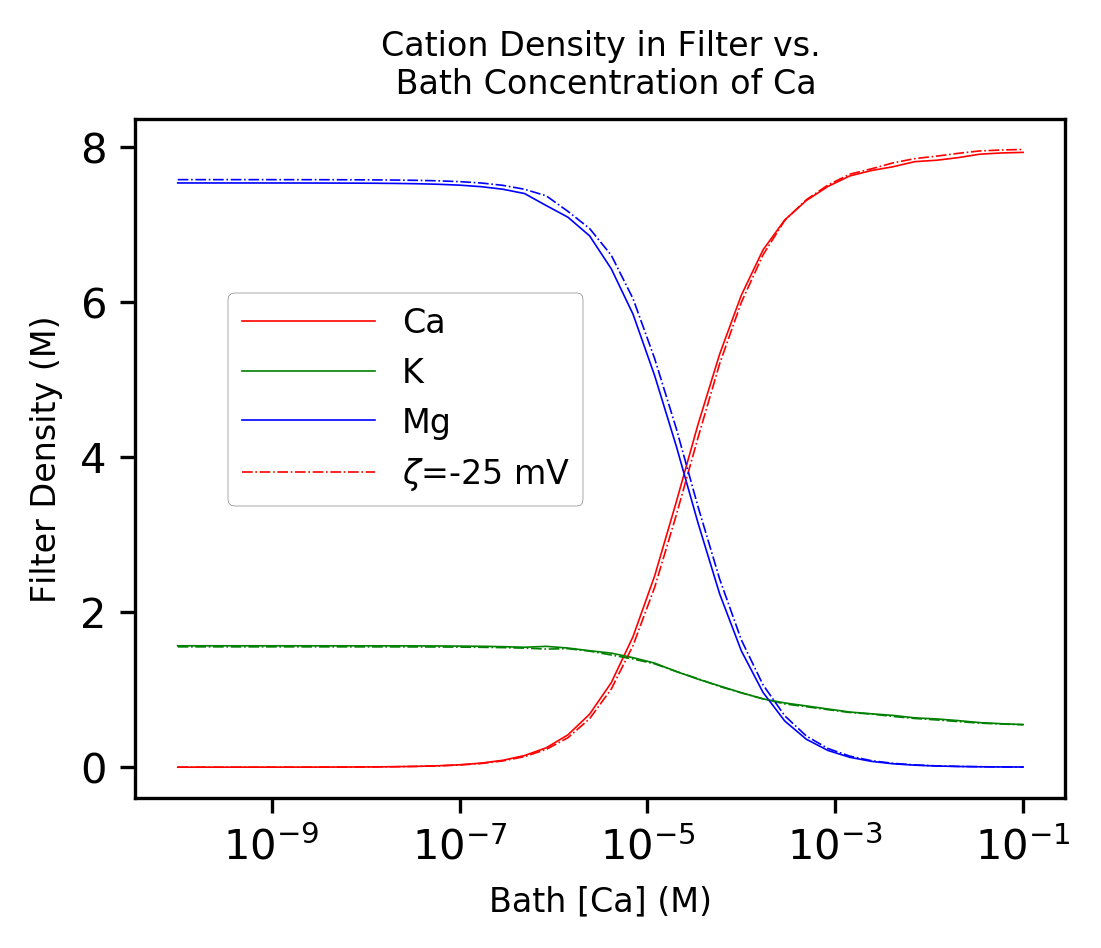

In [21]:

idxO=0
idxCl=1
idxK=2
idxCa=3
idxMg=4
font = {'size'   : 8}

%matplotlib inline
lw=0.4
matplotlib.rcParams['figure.figsize'] = (4,3)
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['mathtext.rm'] = 'serif'
plt.plot(original_cacl2s,oriCadensity,'r-',linewidth=lw,label="Ca")
#plt.plot(original_cacl2s,ECadensity,'r-.',linewidth=lw,label="Ca$^{2+}$")
plt.plot(original_cacl2s,oriKdensity,'g-',linewidth=lw,label='K')
plt.plot(original_cacl2s,oriMgdensity,'b-',linewidth=lw,label='Mg')

plt.plot(original_cacl2s,ECadensity,'r-.',linewidth=lw,label="$\\zeta$=-25 mV")
plt.plot(original_cacl2s,EKdensity,'g-.',linewidth=lw)
plt.plot(original_cacl2s,EMgdensity,'b-.',linewidth=lw)
#plt.plot(original_cacl2s,EMgdensity,'b-.',label='Mg$^{2+}$')
#plt.plot(cacl2s,varyingCa_rhoFilters[:,idxMg]*1.6606,'b--')
plt.title("Cation Density in Filter vs.\n Bath Concentration of Ca", fontsize=8)
plt.ylabel("Filter Density (M)", fontsize=8)
#plt.yticks(np.arange(0,10,2),np.arange(0,10,2))
#axx = plt.gca()

#plt.xticks(np.arange(0,10,2),10**np.linspace(-10,0,4))
plt.xlabel("Bath [Ca] (M)", fontsize=8)
plt.xscale("log")
#print (np.linspace(1,9,5))
#xtickss=[]
#for i in np.linspace(1,9,5):
#    print (i)
#    xtickss.append(10**(-i))
#plt.xticks(xtickss,fontsize=7)

leg=plt.legend(loc=(0.1,0.43),fontsize=8,handlelength=4)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.1)

In [22]:
print (original_cacl2s[24]/original_cacl2s[23])#,oriCadensity) 
print (np.abs(np.asarray(oriCadensity)- np.asarray(oriMgdensity))) # find out [Ca]/[Mg] = 1:1 point with neutral membrance

print (np.abs(np.asarray(ECadensity)- np.asarray(EMgdensity))) # with charged membrance

1.7012542798525856
[7.53866359 7.5386219  7.53855098 7.53843033 7.53822508 7.53787591
 7.53728056 7.53627014 7.53455147 7.5316285  7.52665842 7.51821187
 7.50386232 7.47951393 7.43827488 7.36864345 7.25168234 6.99642482
 6.67964672 6.1716491  5.33982927 4.16385723 2.58441835 0.71563411
 1.27064016 3.09687243 4.59156038 5.71086844 6.46555161 6.95325397
 7.27942357 7.50140004 7.62432298 7.70442218 7.78805106 7.81672854
 7.85683212 7.90501584 7.92293758 7.93181088]
[7.58161072 7.58157291 7.58150857 7.58139913 7.58121294 7.5808962
 7.58035738 7.57944079 7.57788169 7.57523003 7.57072104 7.56305639
 7.550035   7.52793464 7.49048813 7.42720891 7.32079394 7.14323568
 6.7922071  6.32502057 5.5968261  4.47941445 2.95250092 1.11210996
 0.89007336 2.78152205 4.356794   5.55022674 6.39149737 6.92124435
 7.27307124 7.50901394 7.63744833 7.74875107 7.82372804 7.86762292
 7.9109645  7.94617454 7.9608967  7.96908909]


In [35]:
# now calculate the Ca sites in E1 and E2 state by using MSA
# the pdb structure is 1su4 and 3b9b respectivly.


V_i=[0.33] # filter volume for Ca
#V_i=[0.43] # filter volume for K at P domain, pdb 1T5S

NOXY = [7,4,6,4]  # E1_Cai, E2_Cai, E1_Caii, E2_Caii, for E2 stats, the nOxy are assumbed to be 4
#NOXY = [5,5,5,5]
nIons = 5

cacl2s = 10**-6 #Set CaCl2 fixed
zs = np.array([-0.7469, -1.0, 1.0, 1.77,1.69]) #input charges here 
sigmas = np.array([0.354, 0.454, 0.352, 0.272,0.236]) # IONIC Radii based on Force Fields (Li/Merz)#


#these lists store results with solvation
rhoFilters_s=[]
donnanPotentials_s =[]
mufilters_s=[]
mu_ESs_s=[]
mu_HSs_s=[]

for i,j in enumerate(NOXY):
    print (j)
    Ns = np.array([j, 1., 1., 1.,1.])
    #these lists store result with solvation
    temp_rhoFilters=[]
    temp_donnanPotentials=[]
    temp_mufilters=[]
    temp_mu_ESs=[]
    temp_mu_HSs=[]
    #these lists store results with solvation
    temp_rhoFilters_s=[]
    temp_donnanPotentials_s =[]
    temp_mufilters_s=[]
    temp_mu_ESs_s=[]
    temp_mu_HSs_s=[]
    for m,n in enumerate(V_i):
        msa.nOxy=Ns[0]
        print (n) # here n is the filter volume 
        muiexsPrev = np.zeros(nIons)
        psiPrev = 0.
        muiexsPrev = 0
        alpha = 0.00010
        conc_M = np.array([1e-200, (150.0e-3 + 2*cacl2s + 4e-3), 150.0e-3, cacl2s,2e-3]) # [M] order is  O Cl, K, Ca Mg(bath) 
     
  #now turn on the solvation...
        mufilteri_s,donnanPotentiali_s,mu_ESi_s,mu_HSi_s,rhoFilteri_s = msa.SolveMSAEquations(filter_dielectric,conc_M,zs,Ns,n,sigmas, \
                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=alpha,solvation = True)
    
     
        
        temp_mufilters_s.append(mufilteri_s)
        temp_mu_ESs_s.append(mu_ESi_s)
        temp_mu_HSs_s.append(mu_HSi_s)
        temp_rhoFilters_s.append(rhoFilteri_s) 
        temp_donnanPotentials_s.append(donnanPotentiali_s)
        
        muiexsPrev=mufilteri_s 
        psiPrev = donnanPotentiali_s  
      
   
    #these lists store results with solvation
    rhoFilters_s.append(temp_rhoFilters_s)
    donnanPotentials_s.append(temp_donnanPotentials_s)
    mufilters_s.append(temp_mufilters_s)
    mu_ESs_s.append(temp_mu_ESs_s)
    mu_HSs_s.append(temp_mu_HSs_s)
# convert list into array 
#rhoFilters = np.asarray(rhoFilters)
#mufilters = np.asarray(mufilters)
#mu_HSs = np.asarray(mu_HSs)
#mu_ESs = np.asarray(mu_ESs)


7
0.33
MAIN
4
0.33
MAIN
6
0.33
MAIN
4
0.33
MAIN


In [36]:
V_i=[0.33] # volume for Ca2+
def getdata(dataset,ions):
    if ions == "Mg":
        idx = 4
    elif ions == "Ca":
        idx = 3
    elif ions == "K":
        idx = 2
    matrix = np.zeros((1,4))
    data = matrix
    for i,j in enumerate(V_i):
        for m,n in enumerate(NOXY):
            data[i,m] = dataset[m][i][idx]
    
    return data

cadensity = getdata(rhoFilters_s,"Ca")
Mgdensity = getdata(rhoFilters_s,"Mg")
Kdensity = getdata(rhoFilters_s,"K")

Kenergy = convert_to_energy(150.0e-3,Kdensity)
caenergy = convert_to_energy(cacl2s,cadensity)
print (Kenergy[0,:])

[-2.14748066 -2.4062101  -2.3554275  -2.4062101 ]


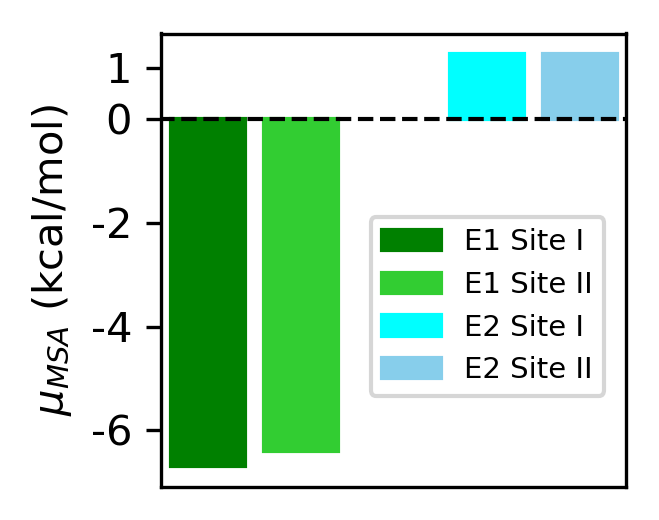

In [55]:
matplotlib.rcParams['figure.figsize']=2,2
matplotlib.rcParams['figure.dpi']=300
barlist=plt.bar([0,1,3,4],[caenergy[0,0],caenergy[0,2],caenergy[0,1],caenergy[0,3]])
colors = ['green','limegreen','cyan','skyblue']
for i,j in enumerate(barlist):
    j.set_color(colors[i])

#plt.ylim([0,1])
plt.yticks([-6,-4,-2,0,1],[-6,-4,-2,0,1])
#plt.xticks([0],[""])
plt.ylabel("$\mu_{MSA}$ (kcal/mol)")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

#plt.ylim([0,1])
plt.plot([-1,6],[0,0],'k--',lw=1)
plt.xlim([-0.5,4.5])
plt.legend((barlist[0],barlist[1],barlist[2],barlist[3]),("E1 Site I",'E1 Site II','E2 Site I','E2 Site II')\
          ,fontsize=7, loc=([0.45,0.2]))
#plt.title('Crystal sites MSA')

[ 1.  3.  5.  7.  9.]
1.0
3.0
5.0
7.0
9.0


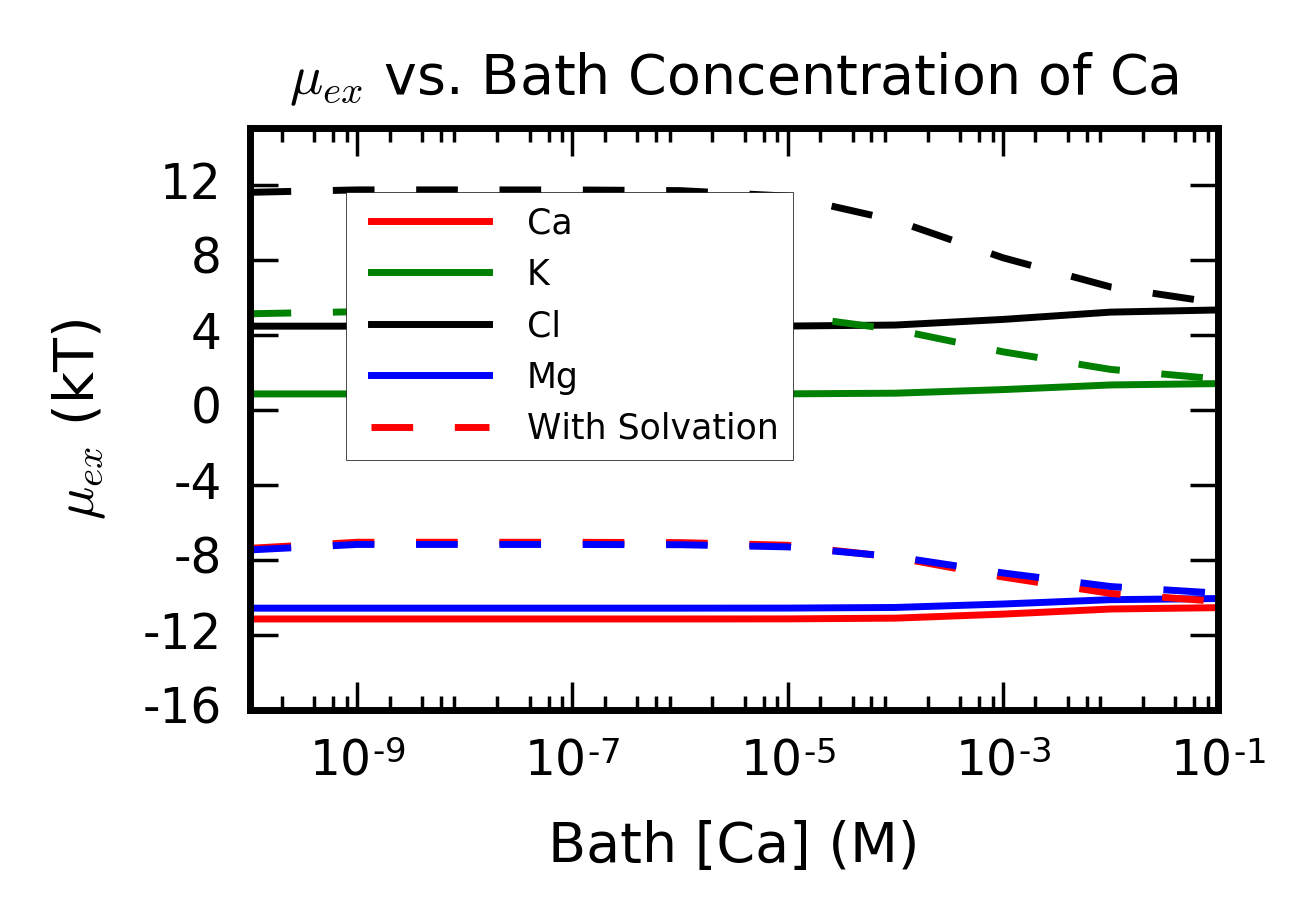

In [45]:
idxCl=1
idxO=0
idxCa=3
idxK=2
idxMg=4
#plt.plot(cacl2s,(mufilters[:,idxCa]),'k--',label="Ca (adj) ")
plt.plot(cacl2s,(mufilters[:,idxCa]),'r-',label="Ca")
plt.plot(cacl2s,mufilters[:,idxK],'g-', label="K")
plt.plot(cacl2s,mufilters[:,idxCl],'k-',label="Cl")
plt.plot(cacl2s,mufilters[:,idxMg],'b-',label="Mg")

plt.plot(cacl2s,(mufilters_s[:,idxCa]),'r--',label="With Solvation")
plt.plot(cacl2s,mufilters_s[:,idxK],'g--')
plt.plot(cacl2s,mufilters_s[:,idxCl],'k--')
plt.plot(cacl2s,mufilters_s[:,idxMg],'b--')

#plt.plot(cacl2s,mufilters[:,idxO],'y-',label="O ")
#plt.plot(cacl2s,(mufilters[:,idxMg]+12.034),'m--',label="Mg (adj) ")
#plt.plot(cacl2s,(mufilters[:,idxMg]),'m-',label="Mg")
plt.yticks(np.arange(-16,16,4),np.arange(-16,16,4),fontsize=7)
plt.title("$\mu_{ex}$ vs. Bath Concentration of Ca", fontsize=8)
plt.ylabel("$\mu_{ex}$ (kT)", fontsize=8)
plt.xlabel("Bath [Ca] (M)", **font)
plt.xscale("log", **font)
print np.linspace(1,9,5)
xtickss=[]
for i in np.linspace(1,9,5):
    print i
    xtickss.append(10**(-i))
plt.xticks(xtickss,fontsize=7)

leg=plt.legend(loc=(0.1,0.43),fontsize=5,handlelength=4)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.1)
#plt.ylim(-12,6)
#plt.ylim(-15,30)
#plt.tight_layout()
#plt.gcf().savefig("MUS_Nonner.png", dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MUS_150mMKCl_MG_MGvol_5O_limerz_eps175.png", dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MUS_progress_AUG_mgsite.png",dpi=300)
#print mufilters[:,idxMg]+12.034
#print mufilters[:,idxCa]+1.864

[ 1.  3.  5.  7.  9.]
1.0
3.0
5.0
7.0
9.0


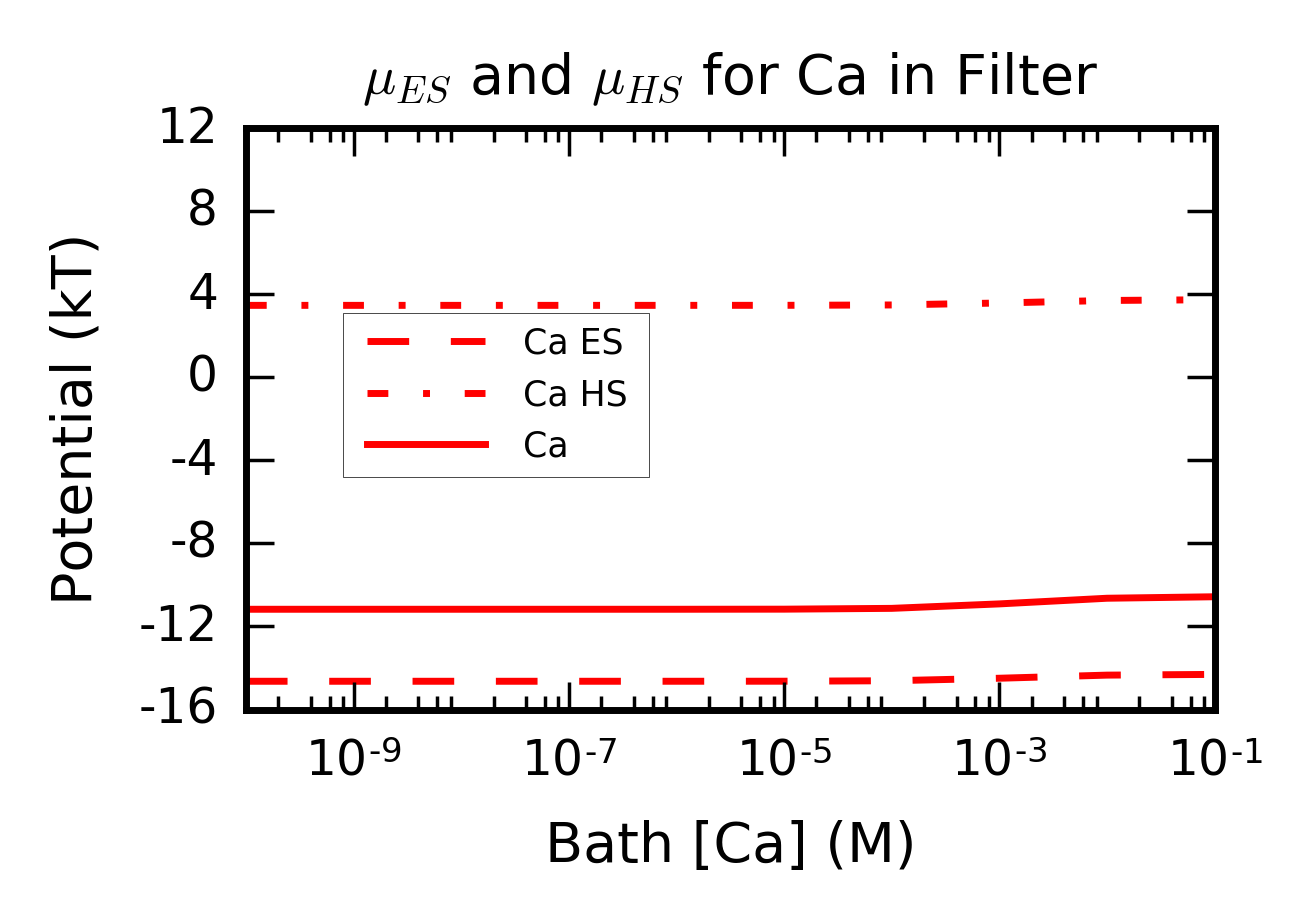

In [49]:
idxCa=3
plt.plot(cacl2s,mu_ESs[:,idxCa],'r--',label="Ca ES ")
plt.plot(cacl2s,mu_HSs[:,idxCa],'r-.',label="Ca HS")
plt.plot(cacl2s,mufilters[:,idxCa],'r-',label="Ca ")
plt.title("$\mu_{ES}$ and $\mu_{HS}$ for Ca in Filter", **font)
plt.ylabel("Potential (kT)", **font)
plt.xlabel("Bath [Ca] (M)", **font)
plt.xscale("log", **font)
plt.yticks(np.arange(-16,16,4),np.arange(-16,16,4),fontsize=7)
#plt.title("$\mu_{ex}$ vs. Bath Concentration of Ca", fontsize=8)
#plt.ylabel("$\mu_{ex}$ (kT)", fontsize=8)
#plt.xlabel("Bath [Ca] (M)", **font)
#plt.xscale("log", **font)
print np.linspace(1,9,5)
xtickss=[]
for i in np.linspace(1,9,5):
    print i
    xtickss.append(10**(-i))
plt.xticks(xtickss,fontsize=7)

leg=plt.legend(loc=(0.1,0.4),fontsize=5,handlelength=4)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.1)



#plt.tight_layout()
#plt.gcf().savefig("CA_Nonner.png",dpi=300)

[ 1.  3.  5.  7.  9.]
1.0
3.0
5.0
7.0
9.0


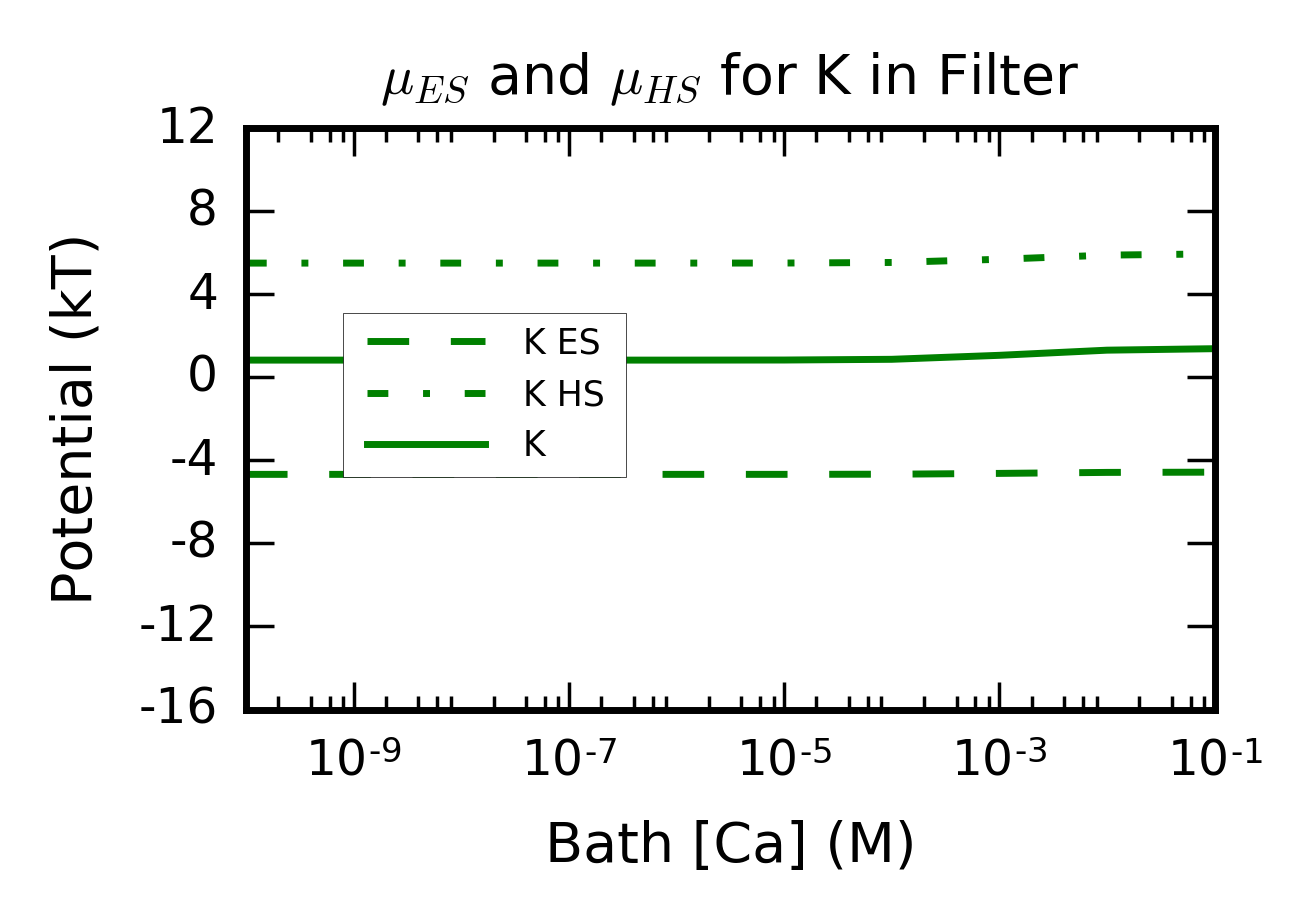

In [50]:
idxK=2
plt.plot(cacl2s,mu_ESs[:,idxK],'g--',label="K ES ")
plt.plot(cacl2s,mu_HSs[:,idxK],'g-.',label="K HS")
plt.plot(cacl2s,mufilters[:,idxK],'g-',label="K ")
plt.title("$\mu_{ES}$ and $\mu_{HS}$ for K in Filter", **font)
plt.ylabel("Potential (kT)", **font)
plt.xlabel("Bath [Ca] (M)", **font)
plt.xscale("log", **font)
plt.yticks(np.arange(-16,16,4),np.arange(-16,16,4),fontsize=7)
#plt.title("$\mu_{ex}$ vs. Bath Concentration of Ca", fontsize=8)
#plt.ylabel("$\mu_{ex}$ (kT)", fontsize=8)
#plt.xlabel("Bath [Ca] (M)", **font)
#plt.xscale("log", **font)
print np.linspace(1,9,5)
xtickss=[]
for i in np.linspace(1,9,5):
    print i
    xtickss.append(10**(-i))
plt.xticks(xtickss,fontsize=7)

leg=plt.legend(loc=(0.1,0.4),fontsize=5,handlelength=4)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.1)


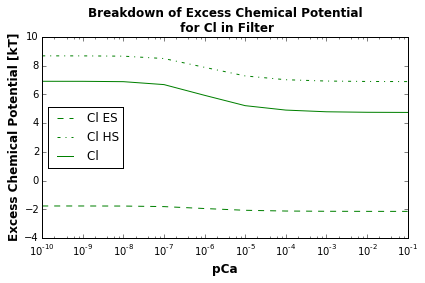

In [37]:
plt.plot(cacl2s,mu_ESs[:,idxCl],'g--',label="Cl ES ")
plt.plot(cacl2s,mu_HSs[:,idxCl],'g-.',label="Cl HS")
plt.plot(cacl2s,mufilters[:,idxCl],'g-',label="Cl ")
plt.title("Breakdown of Excess Chemical Potential\n for Cl in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("CL_Nonner.png",dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/CLMU_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

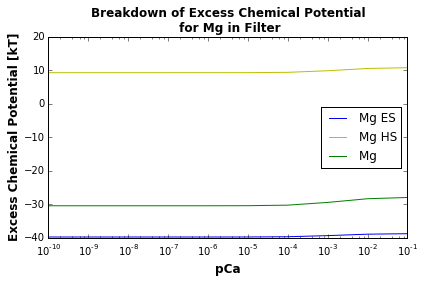

In [19]:
plt.plot(cacl2s,mu_ESs[:,idxMg],'b-',label="Mg ES ")
plt.plot(cacl2s,mu_HSs[:,idxMg],'y-',label="Mg HS")
plt.plot(cacl2s,mufilters[:,idxMg],'g-',label="Mg ")
plt.title("Breakdown of Excess Chemical Potential\n for Mg in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("MG_breakdown_150919_LIMERZ.png",dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/MGMU_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

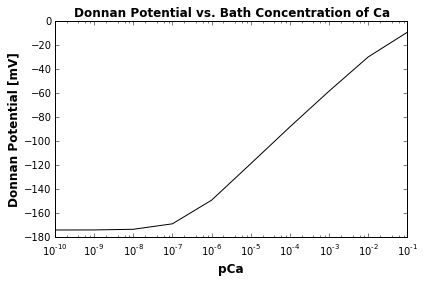

In [39]:
plt.plot(cacl2s,donnanPotentials, 'k-')
#plt.plot(cacl2s, nonnerpsi, 'b-.', label="Nonner Psi")
plt.title("Donnan Potential vs. Bath Concentration of Ca", **font) 
plt.ylabel("Donnan Potential [mV]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log")
#plt.ylim(-200,50)
plt.tight_layout()
plt.gcf().savefig("PSI_nonner.png",dpi=300)

#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/PSI_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

In [15]:
V_is = [3.0,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
eps_filters = [100.0,90.0,80.0,70.0,60.0,50.0,40.0,30.0]
nIons = 5
#nConcs = 3
#cacl2s = 10**np.linspace(-7,-5,nConcs)
cacl2s = np.array([1.0e-6])
rhoFilters=[] 
donnanPotentials = []
mufilters=[]
mu_ESs=[]
mu_HSs=[]
muiexsPrev = np.zeros(nIons)
psiPrev = 0.
muiexsPrev = 0.
alpha = 1e-3

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        #for k, cacl2i in enumerate(cacl2s):
        conc_M = np.array([1e-200, (150.0e-3 + 2.0*cacl2s+2.0e-3), 150.0e-3, cacl2s,1.0e-3])  # [M] order is  O Cl, Na, Ca (bath) 
        mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
                                                                          psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        


        # save calcium to matrix
        idxCa = 3
        mymufilters[i,j] = mufilteri[idxCa]
        
        mufilters.append(mufilteri)
        mufilters[i] = mufilteri
        mu_ESs.append(mu_ESi)
        mu_ESs[i] = mu_ESi
        mu_HSs.append(mu_HSi)
        mu_HSs[i] = mu_HSi
        muiexsPrev=mufilteri 
        donnanPotentials.append(donnanPotentiali)
        donnanPotentials[i] = donnanPotentiali
        psiPrev = donnanPotentiali  
        rhoFilters.append(rhoFilteri)
        rhoFilters[i] = rhoFilteri  

            
# PKH 
#root = "150610_"
#fileNameVs = root+"_Vs.txt"
#np.savetxt(fileNameVs,V_is)
#fileNameEpss = root+"_Epss.txt"
#np.savetxt(fileNameEpss,eps_filters)

# todo 
donnanPotentials = np.asarray(donnanPotentials)
rhoFilters = np.asarray(rhoFilters)

#fileNamemuCa=root+"_muCa.txt"
#np.savetxt(fileNamemufilters,muCa)



mu_HSs = np.asarray(mu_HSs)
mu_ESs = np.asarray(mu_ESs)








MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN


KeyboardInterrupt: 

[[-2.37492689]
 [-5.72498553]
 [-6.07672958]
 [-5.99625238]
 [-5.80737874]
 [-5.60589019]]


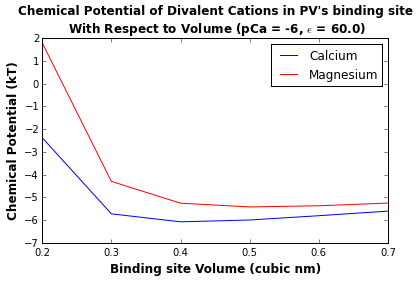

In [87]:
font = {'weight' : 'bold','size'   : 12}
print mymufiltersca
plt.plot(V_is,mymufiltersca, 'b', label = "Calcium")
plt.plot(V_is,mymufiltersmg, 'r', label = "Magnesium")
plt.legend(loc="best")
plt.title("Chemical Potential of Divalent Cations in PV's binding site\n With Respect to Volume (pCa = -6, $\epsilon$ = 60.0)", **font)
plt.ylabel("Chemical Potential (kT)", **font)
plt.xlabel("Binding site Volume (cubic nm)", **font)
plt.tight_layout()
plt.gcf().savefig("XSEDE_grantplot_ANK_eps_and_Vs.png", dpi = 300)

In [18]:

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        for k, cacl2i in enumerate(cacl2s):
            conc_M = np.array([1e-200, (100.0e-3 + 2*cacl2i), 100.0e-3, cacl2i])  # [M] order is  O Cl, Na, Ca (bath) 
            #mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
            #                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        

            mufilteri = np.ones(4)*i*j
            # save calcium to matrix
            idxCa = 3
            mymufilters[i,j] = mufilteri[idxCa]

            
            
plt.pcolormesh(np.array(V_is),np.array(eps_filters),mymufilters.T)            
plt.colorbar()

NameError: name 'V_is' is not defined

In [69]:
V_is = [0.2,0.3,0.4,0.5,0.6,0.7]
eps_filters = [10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0]
nIons = 5
nConcs = 3
cacl2s = 10**np.linspace(-7,-5,nConcs)

rhoFilters=[] 
donnanPotentials = []
mufilters=[]
mu_ESs=[]
mu_HSs=[]
muiexsPrev = np.zeros(nIons)
psiPrev = 0.
muiexsPrev = 0.
alpha = 1e-3

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])
myrhofilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        #for k, cacl2i in enumerate(cacl2s):
        conc_M = np.array([1e-200, (150.0e-3 + 4.0e-3 + 2*1.0e-7), 150.0e-3, 1.0e-7, 2.0e-3])  # [M] order is  O Cl, Na, Ca, Mg (bath) 
        mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
                                                                          psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        


            # save calcium/mg to matrix
        idxCa = 4
        mymufilters[i,j] = mufilteri[idxCa]
        myrhofilters[i,j] = rhoFilteri[idxCa]
        mufilters.append(mufilteri)
        mufilters[i] = mufilteri
        mu_ESs.append(mu_ESi)
        mu_ESs[i] = mu_ESi
        mu_HSs.append(mu_HSi)
        mu_HSs[i] = mu_HSi
        muiexsPrev=mufilteri 
        donnanPotentials.append(donnanPotentiali)
        donnanPotentials[i] = donnanPotentiali
        psiPrev = donnanPotentiali  
        rhoFilters.append(rhoFilteri)
        rhoFilters[i] = rhoFilteri  

            
# PKH 
root = "150610_"
fileNameVs = root+"_Vs.txt"
np.savetxt(fileNameVs,V_is)
fileNameEpss = root+"_Epss.txt"
np.savetxt(fileNameEpss,eps_filters)

# todo 
mufilters = np.asarray(mufilters)
donnanPotentials = np.asarray(donnanPotentials)
rhoFilters = np.asarray(rhoFilters)

##fileNamemuCa=root+"_muCa.txt"
#np.savetxt(fileNamemufilters,muCa)



mu_HSs = np.asarray(mu_HSs)
mu_ESs = np.asarray(mu_ESs)



MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN


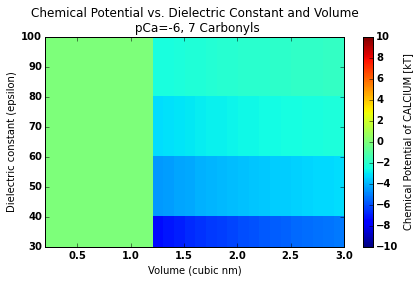

In [27]:
     
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
pcolormesh(np.asarray(V_is),np.asarray(eps_filters),mymufilters.T,vmin=-10,vmax=10)

plt.colorbar(label = "Chemical Potential of CALCIUM [kT]")
plt.title("Chemical Potential vs. Dielectric Constant and Volume \n pCa=-6, 7 Carbonyls")
plt.xlabel("Volume (cubic nm)")
plt.ylabel("Dielectric constant (epsilon)")
plt.xlim(0.2,3.0)
plt.tight_layout()
#plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/testMSA2D_7carbonyls_CA.png", dpi = 300)
#plt.gcf().savefig("EPS_and_Vs_against_mus_pCaminus7_MG.png", dpi = 300)

In [17]:
print mymufilters

[[-1.77263076 -1.77285043 -2.29103642 -2.2913926  -3.18429528 -3.18497194
  -5.12102231 -5.12279376]
 [-1.7955331  -1.79575593 -2.32236348 -2.32272513 -3.23085226 -3.23153958
  -5.20011547 -5.20191541]
 [-1.81936439 -1.81959071 -2.35527119 -2.35563862 -3.27981043 -3.28050898
  -5.28305696 -5.28488683]
 [-1.84438608 -1.84461609 -2.38989409 -2.39026762 -3.33136818 -3.3320786
  -5.3701258  -5.37198714]
 [-1.87070095 -1.87093487 -2.42638222 -2.42676219 -3.38574547 -3.38646844
  -5.46162858 -5.46352306]
 [-1.89842407 -1.89866214 -2.46490322 -2.46529004 -3.44318658 -3.44392285
  -5.55790335 -5.55983278]
 [-1.92768445 -1.92792691 -2.50564474 -2.50603884 -3.50396326 -3.50471364
  -5.65932419 -5.66129052]
 [-1.95862676 -1.95887393 -2.5488175  -2.54921934 -3.56837863 -3.56914402
  -5.76630645 -5.7683118 ]
 [-1.9914138  -1.99166598 -2.59465782 -2.59506793 -3.63677106 -3.63755246
  -5.87931356 -5.88136028]
 [-2.02622849 -2.02648604 -2.64343184 -2.64385081 -3.70951941 -3.71031792
  -5.99886467 -6.0

In [60]:
print CD_rhos


[[  1.06035889e+01   2.53804476e-03   3.67622687e-02   7.68480502e-07
    4.66603314e+00]
 [  1.06035889e+01   2.53804903e-03   3.67622358e-02   7.68479291e-06
    4.66602591e+00]
 [  1.06035889e+01   2.53806879e-03   3.67618557e-02   7.68466773e-05
    4.66595371e+00]
 [  1.06035889e+01   2.53824415e-03   3.67580036e-02   7.68341145e-04
    4.66523156e+00]
 [  1.06035889e+01   2.53997784e-03   3.67195075e-02   7.67087254e-03
    4.65802537e+00]
 [  1.06035889e+01   2.52330994e-03   3.62914663e-02   7.54245743e-02
    4.58730760e+00]
 [  1.06035889e+01   2.42796265e-03   3.27031658e-02   6.47428656e-01
    3.99029309e+00]
 [  1.06035889e+01   2.48667302e-03   1.88298800e-02   2.74516047e+00
    1.80150314e+00]
 [  1.06035889e+01   5.50411600e-03   6.28113220e-03   4.18311374e+00
    3.04689014e-01]
 [  1.06035889e+01   2.43546107e-02   1.99722115e-03   4.45196851e+00
    3.67934391e-02]]


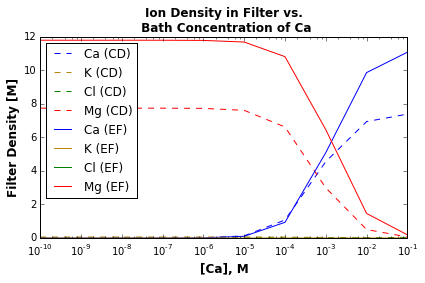

In [42]:
CD_rhos = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_CD_rhos.txt")
EF_rhos = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_EF_rhos.txt")

idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4
font = {'weight' : 'bold','size'   : 12}

plt.plot(cacl2s,CD_rhos[:,idxCa]*1.6606,'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_rhos[:,idxNa]*1.6606,'--',color='darkgoldenrod', label="K (CD)")
plt.plot(cacl2s,CD_rhos[:,idxCl]*1.6606,'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_rhos[:,idxMg]*1.6606,'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_rhos[:,idxCa]*1.6606,'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_rhos[:,idxNa]*1.6606,'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_rhos[:,idxCl]*1.6606,'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_rhos[:,idxMg]*1.6606,'r-',label="Mg (EF)")
plt.title("Ion Density in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Filter Density [M]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_rhos.png", dpi=300)

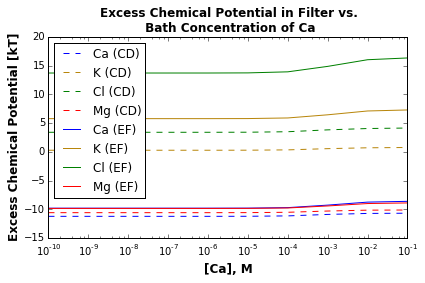

In [9]:
cacl2s = 10**np.linspace(-10,-1,10)
CD_mus = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_CD_mus.txt")
EF_mus = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_EF_mus.txt")
idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4

font = {'weight' : 'bold','size'   : 12}

plt.plot(cacl2s,CD_mus[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_mus[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
plt.plot(cacl2s,CD_mus[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_mus[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_mus[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_mus[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_mus[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_mus[:,idxMg],'r-',label="Mg (EF)")
plt.title("Excess Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc=2)
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_mus.png", dpi=300)

In [44]:
#CD site
rho_MG_adj_CD = CD_rhos[:,idxMg]*1.6606*np.exp(-12.034) / (CD_rhos[:,idxMg]*1.6606*np.exp(-12.034)+CD_rhos[:,idxCa]*1.6606*np.exp(-1.864))
rho_CA_adj_CD = CD_rhos[:,idxCa]*1.6606*np.exp(-1.864) / (CD_rhos[:,idxMg]*1.6606*np.exp(-12.034)+CD_rhos[:,idxCa]*1.6606*np.exp(-1.864))
mu_MG_adj_CD = CD_mus[:,idxMg] + 12.034
mu_CA_adj_CD = CD_mus[:,idxCa] + 1.864

#EF site
rho_MG_adj_EF = EF_rhos[:,idxMg]*1.6606*np.exp(-14.407) / (EF_rhos[:,idxMg]*1.6606*np.exp(-14.407)+EF_rhos[:,idxCa]*1.6606*np.exp(-2.881))
rho_CA_adj_EF = EF_rhos[:,idxCa]*1.6606*np.exp(-2.881) / (EF_rhos[:,idxMg]*1.6606*np.exp(-14.407)+EF_rhos[:,idxCa]*1.6606*np.exp(-2.881))
mu_MG_adj_EF = EF_mus[:,idxMg] + 14.407
mu_CA_adj_EF = EF_mus[:,idxCa] + 2.881



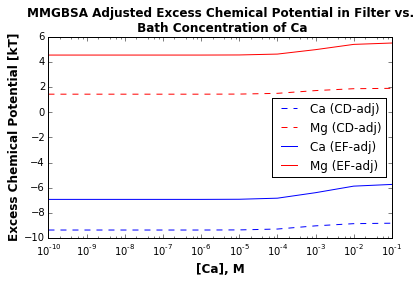

In [45]:
plt.plot(cacl2s,mu_CA_adj_CD,'b--',label="Ca (CD-adj)")
plt.plot(cacl2s,mu_MG_adj_CD,'r--',label="Mg (CD-adj)")
plt.plot(cacl2s,mu_CA_adj_EF,'b-',label="Ca (EF-adj)")
plt.plot(cacl2s,mu_MG_adj_EF,'r-',label="Mg (EF-adj)")
plt.title("MMGBSA Adjusted Excess Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_adjmus.png", dpi=300)

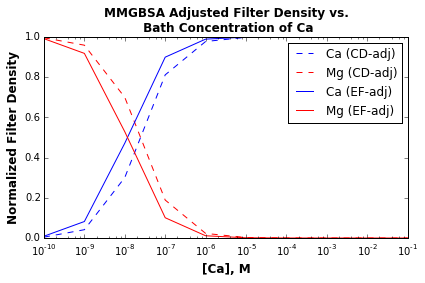

In [46]:
plt.plot(cacl2s,rho_CA_adj_CD,'b--',label="Ca (CD-adj)")
plt.plot(cacl2s,rho_MG_adj_CD,'r--',label="Mg (CD-adj)")
plt.plot(cacl2s,rho_CA_adj_EF,'b-',label="Ca (EF-adj)")
plt.plot(cacl2s,rho_MG_adj_EF,'r-',label="Mg (EF-adj)")
plt.title("MMGBSA Adjusted Filter Density vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Normalized Filter Density", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_adjrhos.png", dpi=300)

In [63]:
CD_HSs = np.loadtxt("MSA_CD_HS.txt")
EF_HSs = np.loadtxt("MSA_EF_HS.txt")


[ 3.06544106  3.0654414   3.06544476  3.06547835  3.06580928  3.06906599
  3.09668163  3.19995064  3.27468766  3.30586647]
10


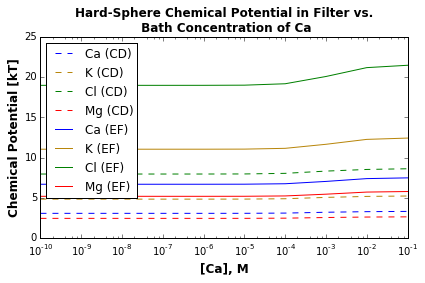

In [71]:

idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4
plt.plot(cacl2s,CD_HSs[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_HSs[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
plt.plot(cacl2s,CD_HSs[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_HSs[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_HSs[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_HSs[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_HSs[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_HSs[:,idxMg],'r-',label="Mg (EF)")
plt.title("Hard-Sphere Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_HSs.png", dpi=300)

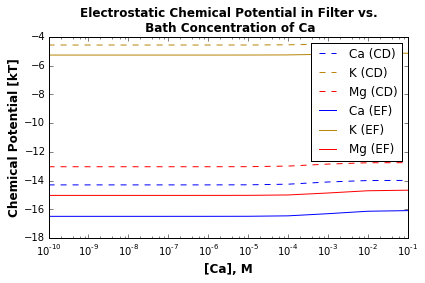

In [75]:
CD_ESs = np.loadtxt("MSA_CD_ES.txt")
EF_ESs = np.loadtxt("MSA_EF_ES.txt")
plt.plot(cacl2s,CD_ESs[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_ESs[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
#plt.plot(cacl2s,CD_ESs[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_ESs[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_ESs[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_ESs[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
#plt.plot(cacl2s,EF_ESs[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_ESs[:,idxMg],'r-',label="Mg (EF)")
plt.title("Electrostatic Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
#plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_ESs.png", dpi=300)